<a href="https://colab.research.google.com/github/Maggiey01/Rights-Colab-YH/blob/main/20F_EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## EDA summary
from 2016 to 2021  
### Submission distribution:
1144 unique tickers, 
1218 unique companies,   
20F issued in month of 3,  2,  1,  4,  6,  5,  9,  7,  8, 10, 11, 12
overall, the number of 20F submission increased from 2016 to 2021.  
the most frequent submission month is Mar and Apr

### Country distribution:
excludelist = ['Cayman Islands','Marshall Islands', 'Bermuda','Luxembourg','Ireland','Jersey','Panama','Bahamas','Mauritius', 'Guernsey','Cyprus','Gibraltar','Anguilla','NA']

2016-2021 20F

out of 4012 filings, 659 filings do not have jurisdication incorporation adress statement.
3576 have valid address
54 unique countries
Exclude countries of tax consideration, 42 countries we want to focus on top five countries are:
Israel 315,
Canada 312,
Switzerland 231,
China 145,
Netherlands 111.
took 1h to process 4108 filings

In [ ]:
from google.colab import drive

drive.mount('/drive')

Mounted at /drive


In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
df_20F = pd.read_csv('/drive/MyDrive/DFG/20F_16_21.csv')


In [ ]:
df_20F.columns

Index(['Unnamed: 0', 'cik', 'company', 'form_type', 'date_filed', 'txt_name',
       'link', 'accession_number', 'ticker', 'Year'],
      dtype='object')

In [ ]:
df_20F.describe().T

,count,mean,std,min,25%,50%,75%,max
Unnamed: 0,5725.0,4.490925e+06,2.837713e+06,20.0,1923922.0,4583057.0,6743956.0,10143550.0
cik,5725.0,1.243996e+06,3.994755e+05,16859.0,1029145.0,1301713.0,1577552.0,1879248.0
Year,5725.0,2.018612e+03,1.727890e+00,2016.0,2017.0,2019.0,2020.0,2021.0


In [ ]:
df_20F = df_20F.drop(columns=['Unnamed: 0'])

In [ ]:
df_20F.shape

(5725, 9)

In [ ]:
df_20F.dtypes

cik                  int64
company             object
form_type           object
date_filed          object
txt_name            object
link                object
accession_number    object
ticker              object
Year                 int64
dtype: object

In [ ]:
df_20F["date_filed"]= pd.to_datetime(df_20F["date_filed"])

## 1. Basic Stats for year, ticker, company, month

In [ ]:
len(df_20F['ticker'].unique())

1144

In [ ]:
len(df_20F['company'].unique())

1218

In [ ]:
df_20F['per'] = df_20F['date_filed'].dt.to_period('M')

In [ ]:
df_20F['month'] = df_20F['date_filed'].dt.month
df_20F['month'].unique()

array([ 3,  2,  1,  4,  6,  5,  9,  7,  8, 10, 11, 12])

In [ ]:
len(df_20F['company'].unique())

### Distribution by Year, month

In [ ]:
df_20F.groupby('Year').count()

,cik,company,form_type,date_filed,txt_name,link,accession_number,ticker,month
Year,,,,,,,,,
2016,904,904,904,904,904,904,904,904,904
2017,887,887,887,887,887,887,887,887,887
2018,907,907,907,907,907,907,907,907,907
2019,951,951,951,951,951,951,951,951,951
2020,981,981,981,981,981,981,981,981,981
2021,1095,1095,1095,1095,1095,1095,1095,1095,1095


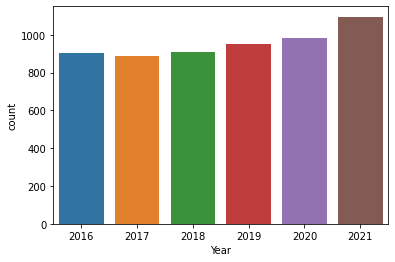

In [ ]:
sns.countplot(data = df_20F, x = 'Year')

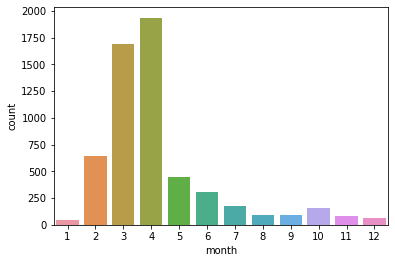

In [ ]:
sns.countplot(data = df_20F, x = 'month')

In [ ]:
df_20F.groupby('ticker').count()

,cik,company,form_type,date_filed,txt_name,link,accession_number,Year,month,per
ticker,,,,,,,,,,
AACG,6,6,6,6,6,6,6,6,6,6
AAU,6,6,6,6,6,6,6,6,6,6
ABB,6,6,6,6,6,6,6,6,6,6
ABCM,1,1,1,1,1,1,1,1,1,1
ABCZF,1,1,1,1,1,1,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...
ZKIN,4,4,4,4,4,4,4,4,4,4
ZLAB,3,3,3,3,3,3,3,3,3,3
ZNH,6,6,6,6,6,6,6,6,6,6


In [ ]:
cor = df.corr()
#cik, year, ticker

In [ ]:
#Percentage of Missing Values in that variable
df_20F.isnull().sum().sum()

0

# Countries - jurisdication address

excludelist = ['Cayman Islands','Marshall Islands', 'Bermuda','Luxembourg','Ireland','Jersey','Panama','Bahamas','Mauritius',
               'Guernsey','Cyprus','Gibraltar','Anguilla','NA']


2016-2021 20F 
1. out of 4012 filings, 659 filings do not have jurisdication incorporation adress statement. 
2. 3576 have valid address   
3. 54 unique countries  
4. Exclude countries of tax consideration, 42 countries we want to focus on 
top five countries are:  
Israel	315,	 
Canada	312,  
Switzerland	231,	  
China	145,  
Netherlands	111.	 
4. took 1h to process 4108 filings

* 
alter before execute  
'local_download_path' path of all 20F files

In [ ]:
df_country = pd.read_csv('/drive/MyDrive/DFG/20F_country.csv')

In [ ]:
df_country.head()

,Unnamed: 0,path,state,jurisdiction_add
0,0,/drive/MyDrive/Rights Colab YH/20F_16_21JD_20-...,"[""N/A (Translation of Registrant's name into E...",Cayman Islands
1,1,/drive/MyDrive/Rights Colab YH/20F_16_21JDCMF_...,"[""N/A (Translation of Registrant's name into E...",Cayman Islands
2,2,/drive/MyDrive/Rights Colab YH/20F_16_21_UNK_2...,"['Republic of The Marshall Islands\n', '(Juris...",Marshall Islands
3,3,/drive/MyDrive/Rights Colab YH/20F_16_21GLOB_2...,"['Grand Duchy of Luxembourg\n', '(Jurisdiction...",Luxembourg
4,4,/drive/MyDrive/Rights Colab YH/20F_16_21_UNK_2...,"['Bermuda\n', ' (Jurisdiction of incorporation...",Bermuda


In [ ]:
df_country = df_country.drop(columns=['Unnamed: 0','state'])

In [ ]:
df_country.describe().T

,count,unique,top,freq
path,4012,4012,/drive/MyDrive/Rights Colab YH/20F_16_21JD_20-...,1
jurisdiction_add,2917,53,Cayman Islands,401


In [ ]:
df_country['jurisdiction_add'].unique()

array(['Cayman Islands', 'Marshall Islands', 'Luxembourg', 'Bermuda',
       'United Kingdom', 'Israel', 'Peru', 'Panama', 'China', 'Belgium',
       nan, 'Canada', 'France', 'Mauritius', 'Netherlands', 'Chile',
       'Australia', 'Argentina', 'Germany', 'Japan', 'Jersey',
       'United States', 'Philippines', 'Hong Kong', 'Spain', 'Ireland',
       'Italy', 'Mexico', 'Brazil', 'Singapore', 'India', 'Georgia',
       'Switzerland', 'South Africa', 'Sweden', 'Macao', 'Guernsey',
       'United Arab Emirates', 'Bahamas', 'Turkey', 'Russian Federation',
       'New Zealand', 'Cyprus', 'Denmark', 'Indonesia', 'Colombia',
       'Anguilla', 'Uruguay', 'Norway', 'Curaçao', 'Monaco', 'Greece',
       'Austria', 'Finland'], dtype=object)

In [ ]:
len(df_country['jurisdiction_add'].unique())

54

In [ ]:
excludelist = ['Cayman Islands','Marshall Islands', 'Bermuda','Luxembourg','Ireland','Jersey','Panama','Bahamas','Mauritius',
               'Guernsey','Cyprus','Gibraltar','Anguilla','NA']
country_focus = df_country[~df_country['jurisdiction_add'].isin(excludelist)]

In [ ]:
len(country_focus['jurisdiction_add'].unique())

42

In [ ]:
country_focus.groupby('jurisdiction_add').count()

,path,max_rank
jurisdiction_add,,
Argentina,60,60
Australia,47,47
Austria,1,1
Belgium,31,31
Brazil,93,93
Canada,312,312
Chile,44,44
China,145,145
Colombia,8,8


In [ ]:
country_focus['max_rank'] = country_focus['jurisdiction_add'].rank(method='max', ascending=False)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
df_country.isnull().sum()

path                   0
jurisdiction_add    1095
max_rank            1095
dtype: int64